In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import math

In [188]:
df = pd.read_csv('Data.csv')
df

Wife's age  Wife's education  Husband's education  \
0             24                 2                    3   
1             45                 1                    3   
2             43                 2                    3   
3             42                 3                    2   
4             36                 3                    3   
...          ...               ...                  ...   
1468          33                 4                    4   
1469          33                 4                    4   
1470          39                 3                    3   
1471          33                 3                    3   
1472          17                 3                    3   

      Number of children ever born  Wife's religion  Wife's now working?  \
0                                3                1                    1   
1                               10                1                    1   
2                                7                1                    1   
3                                9                1                    1   
4                                8                1                    1   
...                            ...              ...                  ...   
1468                             2                1                    0   
1469                             3                1                    1   
1470                             8                1                    0   
1471                             4                1                    0   
1472                             1                1                    1   

      Husband's occupation  Standard-of-living index  Media exposure  \
0                        2                         3               0   
1                        3                         4               0   
2                        3                         4               0   
3                        3                         3               0   
4                        3                         2               0   
...                    ...                       ...             ...   
1468                     2                         4               0   
1469                     1                         4               0   
1470                     1                         4               0   
1471                     2                         2               0   
1472                     2                         4               0   

      Contraceptive method used  
0                             1  
1                             1  
2                             1  
3                             1  
4                             1  
...                         ...  
1468                          3  
1469                          3  
1470                          3  
1471                          3  
1472                          3  

[1473 rows x 10 columns]

In [189]:
df.loc[(df['Contraceptive method used']==1),'Contraceptive method used']=0
df.loc[(df['Contraceptive method used']==2) | (df['Contraceptive method used']==3),'Contraceptive method used']=1
df.loc[(df['Husband\'s education']>=2),'Husband\'s education']=2
df.loc[(df['Wife\'s education']>=2),'Wife\'s education']=2
df.loc[(df['Standard-of-living index']>=2),'Standard-of-living index']=2

In [190]:
y=[]
x=[]
for i in range(2):
    for j in range(2):
        y.append(df[(df['Wife\'s now working?']==i) & (df['Contraceptive method used']==j)]['Wife\'s now working?'].count()/df['Wife\'s now working?'].count())
        x.append(str(i)+str(j))

<BarContainer object of 4 artists>

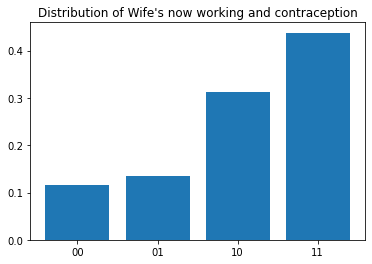

In [191]:
plt.title("Distribution of Wife\'s now working and contraception")
plt.bar(x, y)

In [192]:
yy=[]
for i in range(4):
    print(y[i//2*2], y[i//2*2+1],i//2)
    yy.append(y[i]/(y[i//2*2]+y[i//2*2+1]))

0.11541072640868975 0.13509843856076034 0
0.11541072640868975 0.13509843856076034 0
0.31160896130346233 0.4378818737270876 1
0.31160896130346233 0.4378818737270876 1


<BarContainer object of 4 artists>

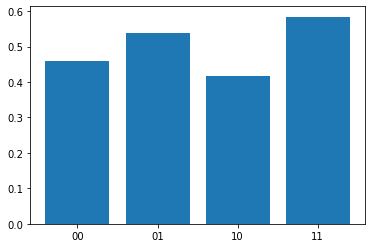

In [194]:
plt.bar(x, yy)

In [195]:
yp = -y[0]*math.log(y[0],2) - y[2]*math.log(y[2],2)
yn = -y[1]*math.log(y[1],2) - y[3]*math.log(y[3],2)

In [196]:
yent = (y[0]+y[2])*yp + (y[1]+y[3])*yn
print(yent)

0.8998267242736786


In [197]:
ynoni = math.pow(y[0],2) + math.pow(y[1],2)
yi = math.pow(y[2],2) + math.pow(y[3],2)
ygini = (y[0]+y[1])*ynoni + (y[2]+y[3])*yi
print(ygini)
print(y[2]+y[3])

0.22439232345063748
0.7494908350305499


In [127]:
sum(y)

1.0

In [133]:
x=df.drop(columns=["Contraceptive method used"])
y=df["Contraceptive method used"]

In [203]:
arr=[0 for i in range(40)]
accx=[i+1 for i in range(40)]
x=df.drop(columns=["Contraceptive method used"])
y=df["Contraceptive method used"]
#del x["Wife's religion"]
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    for j in range(40):
        clf = tree.DecisionTreeClassifier(max_depth=j+1)
        clf.fit(x_train, y_train)
        arr[j] += clf.score(x_test, y_test)
for i in range(len(arr)):
    arr[i]/=100


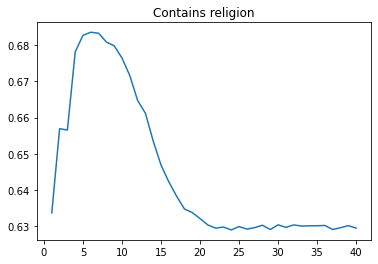

In [204]:
plt.title("Contains religion")
plt.plot(accx, arr)